# Text Classification

#### 20-newgroup dataset is a collection of newsgroups in 20 topics. Fetch 20-newsgroup dataset.

In [1]:
import string
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import multiprocessing

cores = multiprocessing.cpu_count()
print("No. of CPU cores: {}".format(cores))

No. of CPU cores: 12


In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kaushal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from sklearn.datasets import fetch_20newsgroups
bunch = fetch_20newsgroups()
print("Dataset Size: {}".format(len(bunch.data)))
print("Total targets: {}".format(len(bunch.target_names)))
print(bunch.target_names)

Dataset Size: 11314
Total targets: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### Pre-process the dataset: Convert to lowercase, remove punctuations, symbols, and stopwords.

In [4]:
tokenizer = RegexpTokenizer('[a-zA-Z][a-zA-Z]+')
stop_words = stopwords.words('english')

token_corp = []
data = []
for d in bunch.data:
    tokens = tokenizer.tokenize(d)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    token_corp.append(tokens)
    data.append(" ".join(tokens))


In [5]:
print(data[0])
# corpus
print(token_corp[0])

from lerxst wam umd edu thing subject what car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day it door sports car looked late early it called bricklin the doors really small in addition front bumper separate rest body this know if anyone tellme model name engine specs years production car made history whatever info funky looking car please mail thanks il brought neighborhood lerxst
['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'it', 'door', 'sports', 'car', 'looked', 'late', 'early', 'it', 'called', 'bricklin', 'the', 'doors', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'y

#### Convert the words in the dataset to vectors of dimension 100 using Word2Vec. Ignore words whose frequency is less than 10.

In [6]:
import gensim
from gensim import corpora, models, similarities
from gensim.models.doc2vec import TaggedDocument

In [7]:
model = gensim.models.Word2Vec(token_corp, min_count=10, size = 100, workers=cores)

#### Vocabulary size

In [8]:
print("Vocabulary Size: {}".format(len(model.wv.vocab)))

Vocabulary Size: 18159


#### Find the most similar words in the corpus to the word “car” along with their similarities.

In [9]:
print(*model.wv.most_similar('car'), sep="\n")

('cars', 0.8781951665878296)
('dealer', 0.843974232673645)
('truck', 0.8380253314971924)
('bikes', 0.8210299015045166)
('bike', 0.8173125982284546)
('tires', 0.8090174794197083)
('owner', 0.8047407865524292)
('bought', 0.7955347299575806)
('miles', 0.7857893109321594)
('buying', 0.7852137088775635)


#### Find top 5 words similar to the following operations:

* girl + father - boy
* sports - bat + ball

In [10]:
print(*model.wv.most_similar(positive=['girl', 'father'], negative=['boy']), sep="\n")

('mother', 0.8847827315330505)
('son', 0.87343430519104)
('sister', 0.8323902487754822)
('empty', 0.825352132320404)
('fell', 0.8184942007064819)
('prophets', 0.8086466193199158)
('spirit', 0.7949520349502563)
('tomb', 0.7939258813858032)
('divine', 0.7934538125991821)
('burned', 0.7932668328285217)


In [11]:
print(*model.wv.most_similar(positive=['sports', 'ball'], negative=['bat']), sep="\n")

('morning', 0.8365393280982971)
('tonight', 0.8293594121932983)
('yesterday', 0.8185890913009644)
('night', 0.7921475172042847)
('late', 0.7905436754226685)
('playoffs', 0.7904103994369507)
('sharks', 0.7890056371688843)
('fans', 0.7827715277671814)
('winning', 0.7813959121704102)
('braves', 0.779287576675415)


#### Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’, ‘police’, ‘government’, ‘circuit’, ‘car’].

In [12]:
words = ['baseball', 'software', 'police', 'government', 'circuit', 'car']

plot_words = copy.deepcopy(words)

for w in words:
    t = [tup[0] for tup in model.wv.most_similar(w, topn=20)]
    plot_words.extend(t)

print(*plot_words, sep=', ')

baseball, software, police, government, circuit, car, hockey, espn, players, playoff, nhl, stats, fans, game, phillies, braves, league, playoffs, team, yankees, pens, detroit, teams, majors, sports, pitching, macintosh, hardware, machines, network, packages, platforms, graphics, multimedia, electronics, silicon, product, vendor, computers, amiga, architecture, platform, workstations, solutions, support, shareware, taxes, tax, concealed, officers, income, federal, courts, officer, governments, cops, lawyers, aid, funds, officials, guard, foreign, insurance, criminal, labor, passed, authorities, interests, citizen, citizens, legitimate, federal, governments, agencies, protect, experts, agents, demand, restrictions, protecting, cooperation, private, legal, efforts, reform, act, frequency, amp, capability, resolution, signals, controls, operate, transmission, components, feature, signal, circuits, receiver, array, installation, storage, fixed, panel, enable, filter, cars, dealer, truck, bi

/home/kaushal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


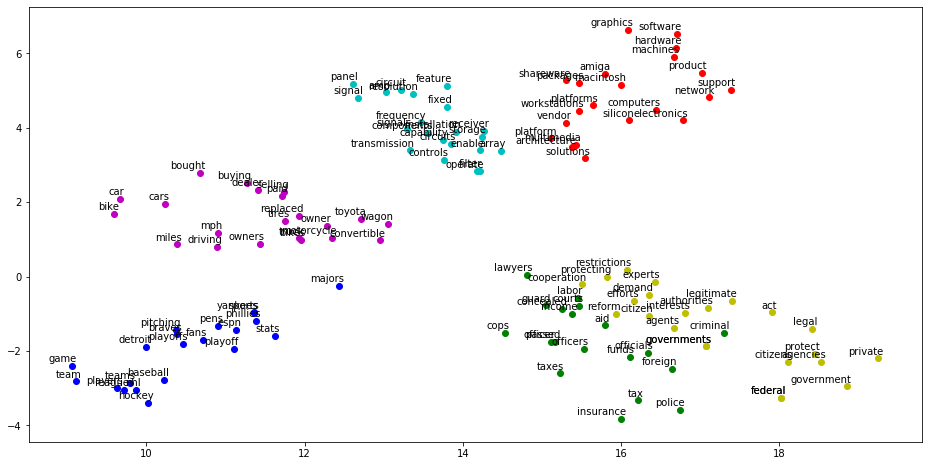

In [13]:
labels = []
tokens = []
color_lst = ['b', 'r', 'g', 'y', 'c', 'm']

for word in plot_words:
    tokens.append(model[word])
    labels.append(word)

# tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 8)) 
for i in range(len(x)):
    res = map(model.wv.similarity, [labels[i] for j in range(len(words))], words)
    t = np.argmax(list(res))
    plt.scatter(x[i],y[i], c=color_lst[t])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

#### The dataset consists of documents. Each document is a datapoint. Formulate a methodology to represent each document as a vector using the word vectors. Mention the method employed to create the vector representation of the documents.

--> We can find the vector representation of a word using the word2vec model. Then we can operate on those vectors to form a better representation of the documents. Some of the operations that I could think of are: 

1. Concatenation of all word vectors which will result in a very large vector if document size is very big, hence this method has some disadvantages. Advantages includes preservation of the sequence in which words appears.

2. Average of all the word vectors.

3. Although average is a good choice but we can improve upon this by using weighted average of word vectors on the basis of their frequency. 

4. We can utilize the power of all of them to form a hybrid methodology, where document is processed line by line. First concatenate all the vectors in a line (zero pad if needed). Once you have all the line vectors take average of all of them to form a single document vector.

--> The straightforward approach of averaging each of a text's words' word-vectors creates a quick and crude document-vector that can often be useful. However, Le and Mikolov in 2014 introduced the Paragraph Vector, which usually outperforms such simple-averaging.

The basic idea is: act as if a document has another floating word-like vector, which contributes to all training predictions, and is updated like other word-vectors, but we will call it a doc-vector. Gensim's Doc2Vec class implements this algorithm and we are going to use the same model here.

In [14]:
tag_doc_list = [TaggedDocument(w, bunch.target_names[i]) 
                for (w, i) in zip(token_corp, bunch.target)]

print("Total tag docs: {}".format(len(tag_doc_list)))
print("Document: {}\nTags:{}".format(tag_doc_list[0][0] , tag_doc_list[0][1]))

Total tag docs: 11314
Document: ['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'it', 'door', 'sports', 'car', 'looked', 'late', 'early', 'it', 'called', 'bricklin', 'the', 'doors', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']
Tags:rec.autos


In [15]:
doc2vec_model = models.doc2vec.Doc2Vec(documents=tag_doc_list, 
                                        vector_size=300, workers=cores)